In [ ]:
# 네이버 검색 API - 뉴스 검색
import os
import sys
import urllib.request

# 발급받은 naver API id / secret
client_id = "********************"
client_secret = "***********"

quote = input("검색어를 입력해주세요.: ") #검색어 입력받기
encText = urllib.parse.quote(quote)

url = "https://openapi.naver.com/v1/search/news?query=" + encText + "&display=50" + "&sort=sim" + "&start=50" # JSON 결과
# url = "https://openapi.naver.com/v1/search/news.xml?query=" + encText # XML 결과

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    body = response_body.decode('utf-8')
    print(body)
else:
    print("Error Code:" + rescode)

#body 나누기
list1 = body.split('\n\t\t{\n\t\t\t')
# print(list1)

{
	"lastBuildDate":"Thu, 12 Dec 2024 23:58:41 +0900",
	"total":684150,
	"start":50,
	"display":50,
	"items":[
		{
			"title":"아시아 유일… <b>손흥민<\/b> 관련 '자랑스러운' 소식이 전해졌다",
			"originallink":"https:\/\/www.wikitree.co.kr\/articles\/1008940",
			"link":"https:\/\/www.wikitree.co.kr\/articles\/1008940",
			"description":"<b>손흥민<\/b>이 '전 세계에서 가장 잘생긴 축구선수 TOP10' 명단에 이름을 올렸다. 스포츠 매체 'UC 크리켓'은 팬들의... <b>손흥민<\/b>은 10명 중 9위에 올랐고, 아시아 선수로는 유일하게 명단에 포함됐다. 매체는 <b>손흥민<\/b>에 대해... ",
			"pubDate":"Thu, 12 Dec 2024 14:00:00 +0900"
		},
		{
			"title":"바르샤-맨유-레알 NO? 결국은 토트넘 종신! <b>손흥민<\/b> 에이전트, 모든 루머...",
			"originallink":"https:\/\/sports.chosun.com\/football\/2024-12-12\/202412120100075050012505",
			"link":"https:\/\/m.sports.naver.com\/wfootball\/article\/076\/0004225340",
			"description":"말을 아꼈던 <b>손흥민<\/b> 에이전트가 직접 나섰다. 재계약에 대한 이야기를 꺼냈다. 11일(한국시각) 영국 스퍼스웹은 '<b>손흥민<\/b>의 에이전트가 <b>손흥민<\/b>의 계약 및 이적 소문에 대해 이야기를 전했다'고 보도했다. 스퍼스웹은... ",
			"pubDate":"Thu, 12 Dec 2024 08:40:00 +0900"
		},
		{
			"title

In [62]:
#제목, 링크 뽑기
import re
titles = []
links = []
for i in list1:
    title = re.findall('"title":"(.*?)",\n\t\t\t"originallink"',i)
    link = re.findall('"link":"(.*?)",\n\t\t\t"description"',i)
    titles.append(title)
    links.append(link)

titles = [r for i in titles for r in i]
links = [r for i in links for r in i]

"""
print('<<제목 모음>>')
print(titles)
print('총 제목 수: ',len(titles),'개')  #제목 개수 확인
print('\n<<링크 모음>>')
print(links)
print('총 링크 수: ',len(links),'개')  #링크 개수 확인
"""

# 링크 다듬기 (필요없는 부분 제거 및 수정)
news_links = []
for i in links:
    a = i.replace('\\','')
    b = a.replace('?Redirect=Log&logNo=','/')
    news_links.append(b)

# print(news_links)
print('생성된 링크 갯수:',len(news_links),'개')

생성된 링크 갯수: 50 개


In [63]:
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service 
import time 
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By 

# 다양한 뉴스 본문 CSS 선택자 리스트
content_selectors = [
    'div.viewer',
    'div._article_content',
    'div.article_content',
    'div.news_contents',
    'div.cont_view',
    'div.article-body',
    'div.article_body',
    'div.arti-txt', 
    'div.art_body',
    'article.story-news',
    'div.article-view-content-div',
    'article',  # 가장 일반적인 article 태그
]

# chromedriver 경로 설정 
chromedriver_path = 'chromedriver.exe' 
service = Service(chromedriver_path) 

# WebDriver 초기화 
driver = webdriver.Chrome(service=service)
wait = WebDriverWait(driver, 3)

# 뉴스 링크 하나씩 불러서 크롤링 
contents = [] 
for i in news_links: 
    driver.get(i)  # 뉴스 링크 하나씩 불러오기 
    time.sleep(1) 

    # 다양한 선택자로 본문 찾기
    content = None
    for selector in content_selectors:
        try:
            content = driver.find_element(By.CSS_SELECTOR, selector).text
            if content and len(content.strip()) > 0:
                contents.append(content)
                break  # 성공적으로 본문을 찾았다면 반복 중단
        except NoSuchElementException:
            continue

    # 본문을 찾지 못한 경우 처리
    if not content:
        contents.append("")

driver.quit()  # 창닫기 
print("<<본문 크롤링이 완료되었습니다.>>")

# 제목 및 본문 txt에 저장
total_contents = titles + contents

text = open("news_text.txt",'w',encoding='utf-8') 
for i in total_contents:
    text.write(i)
text.close()

# 제목, 블로그링크, 본문내용 Dataframe으로 만들기
import pandas as pd

df = pd.DataFrame({'제목':titles, '링크':news_links,'내용':contents})
print(df)

# df 저장
# df.to_csv('{}_뉴스.csv'.format(quote),encoding='utf-8-sig',index=False)

<<본문 크롤링이 완료되었습니다.>>
                                                   제목  \
0             아시아 유일… <b>손흥민<\/b> 관련 '자랑스러운' 소식이 전해졌다   
1   바르샤-맨유-레알 NO? 결국은 토트넘 종신! <b>손흥민<\/b> 에이전트, 모든...   
2      <b>손흥민<\/b>, 이적설 재점화…이번엔 &quot;터키 갈라타사라이&quot;   
3   &quot;토트넘 뭐하냐!? <b>손흥민<\/b> 왜 방치해?&quot;…'대반전'...   
4   ‘짠돌이’ 토트넘 레비 회장, <b>손흥민<\/b> 3년 재계약 소문에 웬일인가 했...   
5   &quot;월드클래스 아닌 <b>손흥민<\/b> 대체자 구하라!&quot; 토트넘 ...   
6         ‘토트넘 레전드로...’ <b>손흥민<\/b>, 토트넘과 장기 계약 체결 전망   
7           <b>손흥민<\/b>, UEL 레인저스전 활약으로 토트넘 무승 부진 끊을까   
8   &quot;주장 <b>손흥민<\/b>, 주급 동결해 토트넘과 장기 재계약 맺을 듯&...   
9   이적사가 종료? ‘충격 대반전’ <b>손흥민<\/b>, 토트넘 레전드로 남는다…주급...   
10  <b>손흥민<\/b> 월클 비주얼, 전세계 미남 축구선수 톱10 선정 “훌륭한 외모...   
11      <b>손흥민<\/b>, 전 세계 미남 축구선수 당당한 9위…“큰 키, 멋진 외모”   
12  충격 반전! 토트넘, <b>손흥민<\/b>, 주급 비합리적...'1+2년 542억'...   
13  ‘쏘니’ 레알·바르샤·맨유 안 가? <b>손흥민<\/b> 에이전트 입 열었다 “토트...   
14  SON의 파격 결단! '세기의 이적' 전부 포기...<b>손흥민<\/b>(33세, ...   
15  &quot;<b>손흥민<\/b>과 2달 전에 계약 체결했어야지!&quot; 토트넘이...   
16  <b>손흥민

In [64]:
from konlpy.tag import Okt
from collections import Counter

news_text = open('news_text.txt','rt', encoding='UTF-8').read()
# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]

line = okt.pos(news_text)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in line:
    if tag in ['Noun','Adjective']:
        n_adj.append(word)

# print(n_adj)

In [65]:
# 명사 또는 형용사만 필터링 + 불용어 제거 + 최소 길이 조건
stopwords = {'라며', '그리고', '그러나', '하지만', '에서', '에게', '중에', '위해', '조차', '까지', '어디', '무엇', '누구', '어느', '있다', '있는', '있습니다', '최근', '이번', '시간', '지난', '소식', '통해', '사진', '무단', '재', '및', '배포', '금지'}
n_adj = [word for word, tag in line if tag in ['Noun', 'Adjective'] and len(word) > 1 and word not in stopwords]

# 단어 빈도수 계산
word_count = Counter(n_adj)

# 상위 50개 단어 출력
tags = word_count.most_common(50)
print(tags)

[('손흥민', 1345), ('토트넘', 925), ('계약', 461), ('연장', 230), ('이적', 199), ('선수', 194), ('재계약', 180), ('시즌', 163), ('갈라타사라이', 159), ('매체', 156), ('바르셀로나', 138), ('옵션', 129), ('이적설', 125), ('보도', 111), ('주장', 109), ('구단', 96), ('경기', 94), ('영국', 94), ('발동', 93), ('홋스퍼', 92), ('레알', 90), ('현재', 87), ('튀르키예', 84), ('오시', 82), ('맨유', 80), ('마드리드', 79), ('가능성', 78), ('여름', 77), ('장기', 76), ('협상', 76), ('내년', 76), ('체결', 69), ('프리미어리그', 69), ('에이전트', 67), ('활약', 67), ('기자', 65), ('예상', 65), ('제안', 64), ('기록', 64), ('퍼스', 63), ('연합뉴스', 62), ('상황', 62), ('주급', 61), ('사실', 60), ('맨체스터', 60), ('만료', 60), ('시장', 60), ('한국', 59), ('유나이티드', 59), ('중이', 59)]


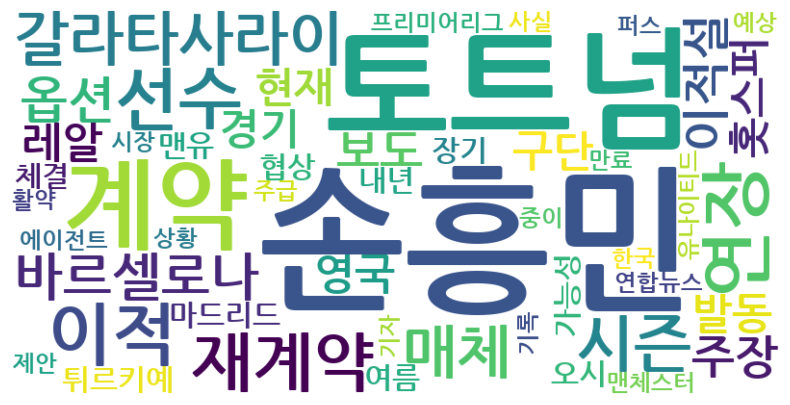

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

wordcloud = WordCloud(
    font_path='NanumGothicBold.ttf',  # 한글 폰트 파일 경로
    width=800, 
    height=400,
    background_color='white'
    # colormap='binary'
).generate_from_frequencies(dict(tags))

# WordCloud 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # 축 제거
plt.show()

# cloud 이미지 저장
# plt.savefig('{}_cloud.png'.format(quote), bbox_inches='tight')
# plt.show()

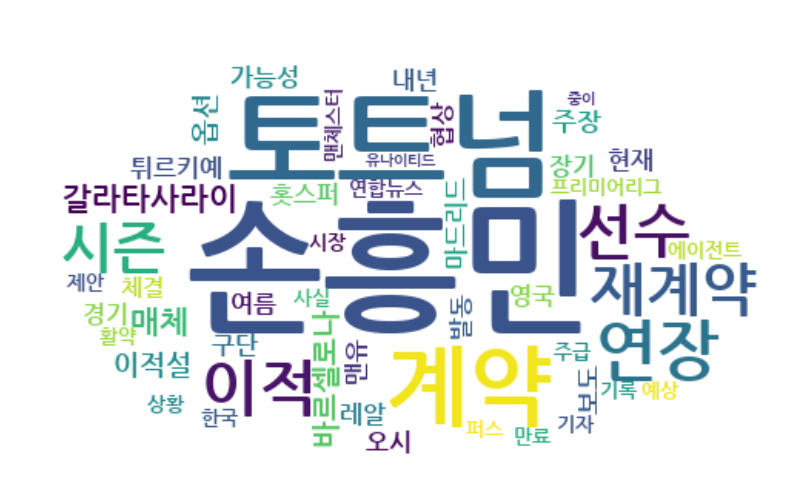

In [83]:
# 이미지 추가(워드크라우드 모양 설정) - cloud
import numpy as np
from PIL import Image

mask = Image.new("RGBA", (500, 300), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
image = Image.open('cloud.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

wordcloud = WordCloud(
    font_path='NanumGothicBold.ttf',  # 한글 폰트 파일 경로
    width=800, 
    height=400, 
    mask=mask,
    background_color='white'
).generate_from_frequencies(dict(tags))

# WordCloud 표시
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # 축 제거

# cloud 이미지 저장
plt.savefig('{}_cloud.png'.format(quote), bbox_inches='tight')
plt.show()

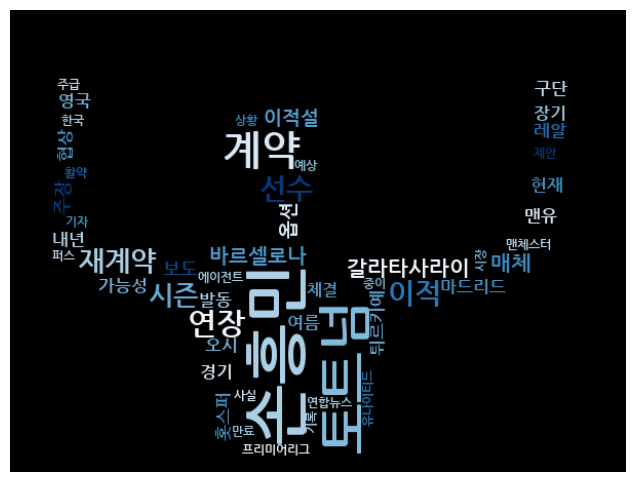

In [ ]:
# 이미지 추가(워드크라우드 모양 설정)
import numpy as np
from PIL import Image

mask = Image.new("RGBA", (600, 450), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
image = Image.open('son.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

wordcloud = WordCloud(
    font_path='NanumGothicBold.ttf',  # 한글 폰트 파일 경로
    width=800, 
    height=400, 
    mask=mask,
    background_color='black',
    colormap='Blues'
).generate_from_frequencies(dict(tags))

# WordCloud 표시
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # 축 제거
plt.show()

# cloud 이미지 저장
# plt.savefig('{}_cloud.png'.format(quote), bbox_inches='tight')
# plt.show()